In [1]:
## 1. Загрузка данных
import pandas as pd
import os
import logging

# Настройка логирования
logging.basicConfig(filename='data_loader.log', level=logging.INFO, 
                    format='%(asctime)s - %(levelname)s - %(message)s')

try:
    if not os.path.exists('online_shoppers.csv'):
        url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv"
        data = pd.read_csv(url)
        data.to_csv('online_shoppers.csv', index=False)
        logging.info("Данные загружены и сохранены в 'online_shoppers.csv'.")
        print("Данные загружены и сохранены в 'online_shoppers.csv'.")
    else:
        logging.info("Файл 'online_shoppers.csv' уже существует.")
        print("Файл 'online_shoppers.csv' уже существует.")
except Exception as e:
    logging.error(f"Ошибка при загрузке данных: {e}")
    print(f"Ошибка при загрузке данных: {e}")

Файл 'online_shoppers.csv' уже существует.


In [2]:
## 2. Очистка данных
import pandas as pd
import os
import logging

# Настройка логирования
logging.basicConfig(filename='data_cleaning.log', level=logging.INFO, 
                    format='%(asctime)s - %(levelname)s - %(message)s')

try:
    if not os.path.exists('online_shoppers.csv'):
        raise FileNotFoundError("Файл 'online_shoppers.csv' не найден!")
    
    data = pd.read_csv('online_shoppers.csv')
    logging.info("Данные успешно загружены для очистки.")
    
    # Удаление дубликатов
    initial_rows = data.shape[0]
    data = data.drop_duplicates()
    removed_rows = initial_rows - data.shape[0]
    logging.info(f"Удалено {removed_rows} дубликатов.")
    
    data.to_csv('cleaned_data.csv', index=False)
    logging.info("Данные очищены и сохранены в 'cleaned_data.csv'.")
    print("Данные очищены и сохранены в 'cleaned_data.csv'.")
except Exception as e:
    logging.error(f"Ошибка при очистке данных: {e}")
    print(f"Ошибка при очистке данных: {e}")

Данные очищены и сохранены в 'cleaned_data.csv'.


Столбцы и типы данных:
Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

Распределение Revenue:
Revenue
False    0.845255
True     0.154745
Name: proportion, dtype: float64

Пропущенные значения:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRa

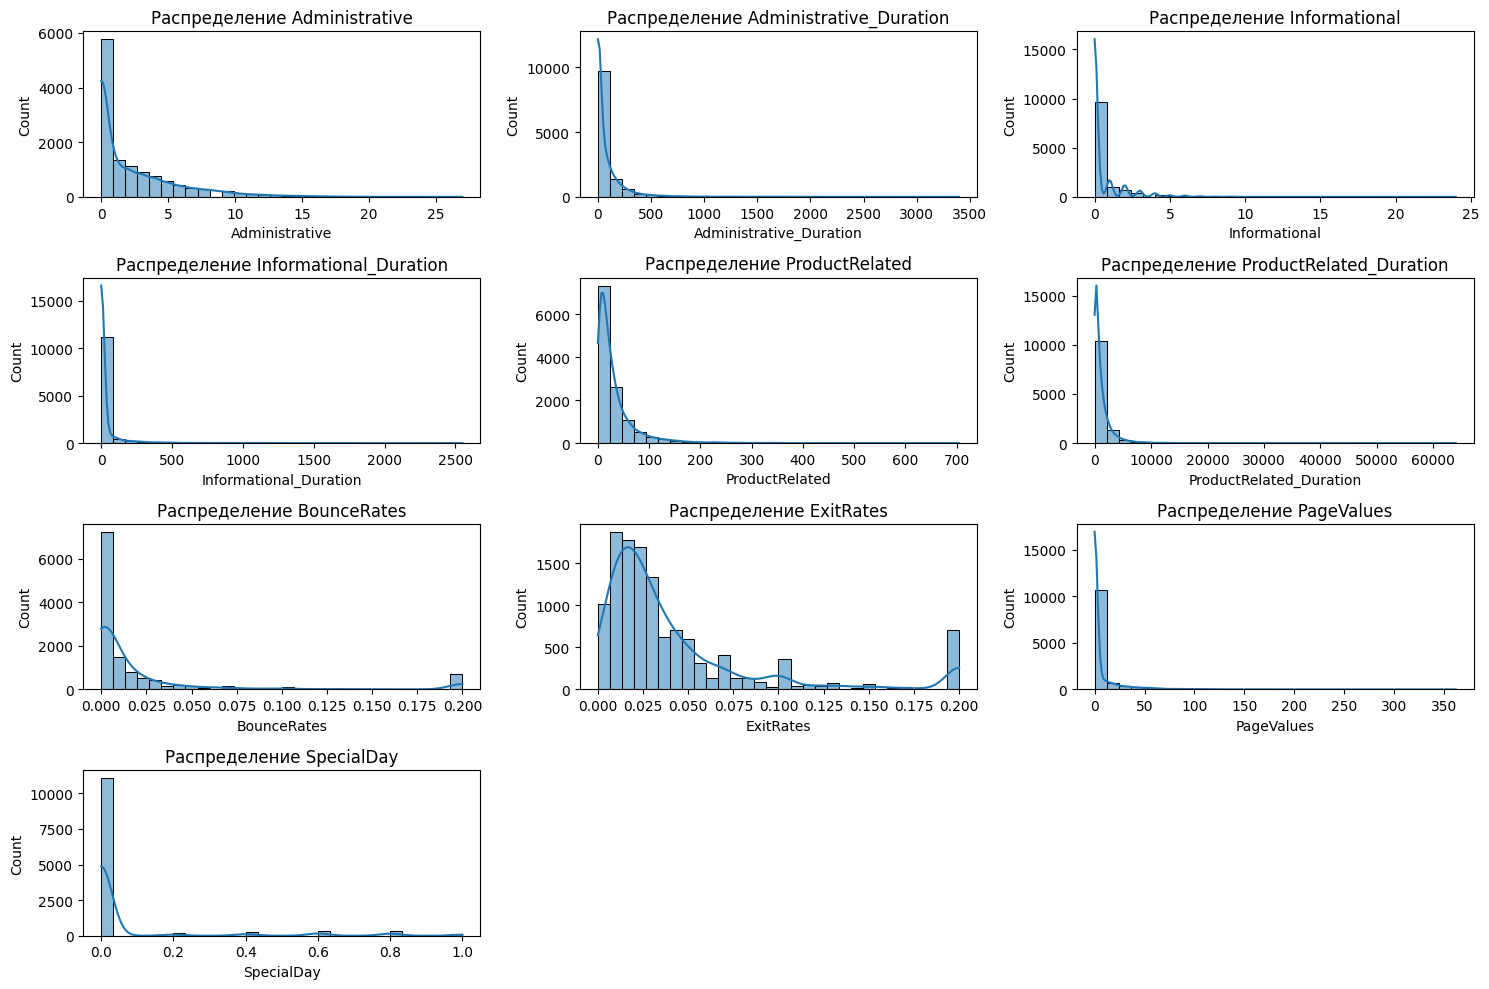

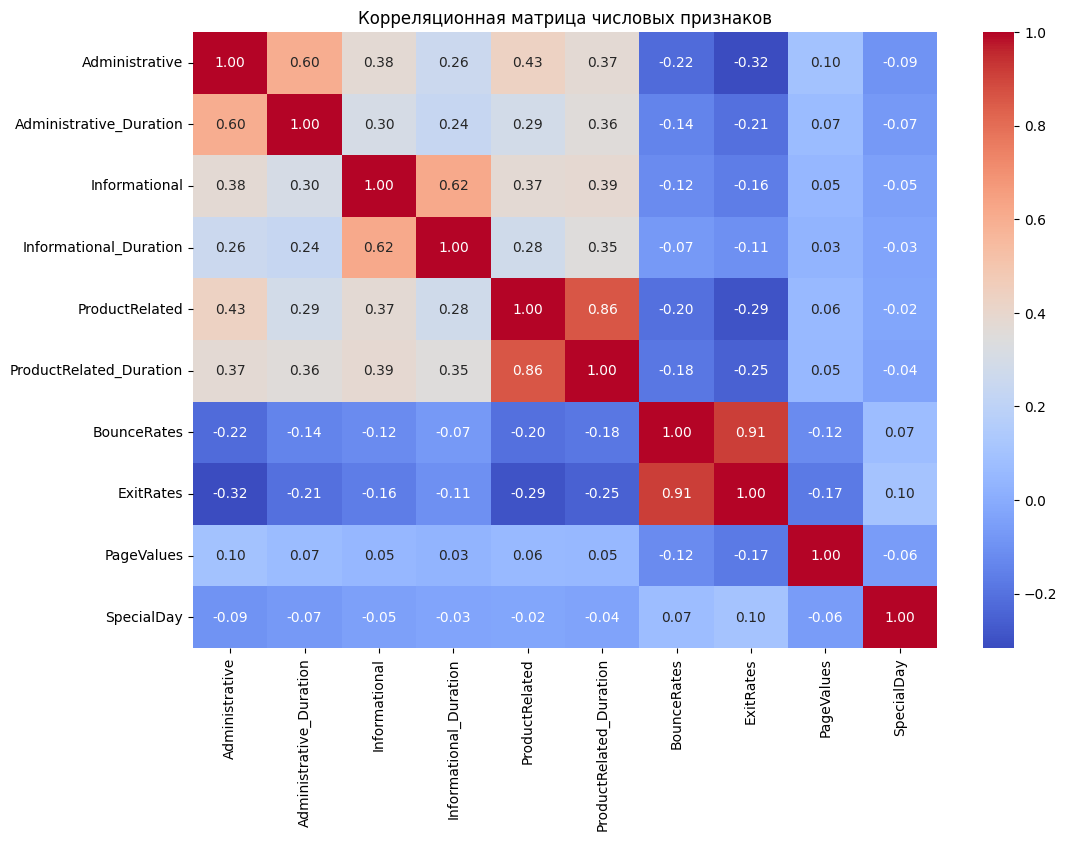

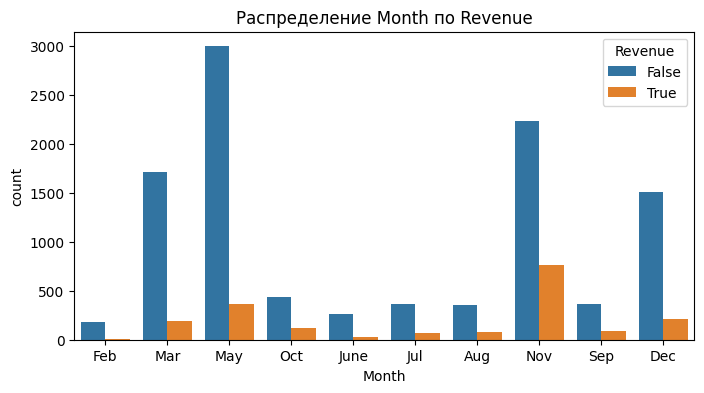

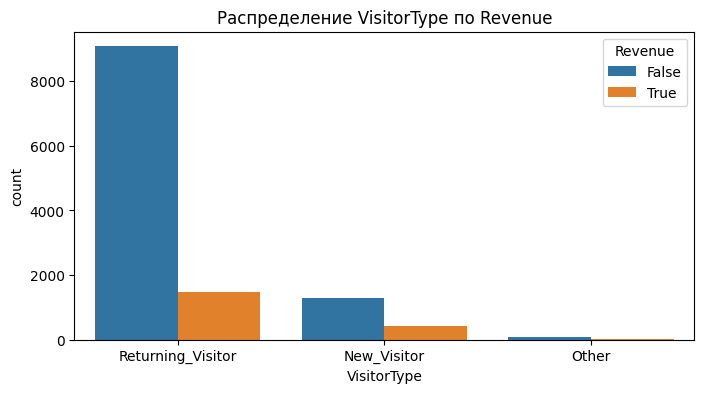

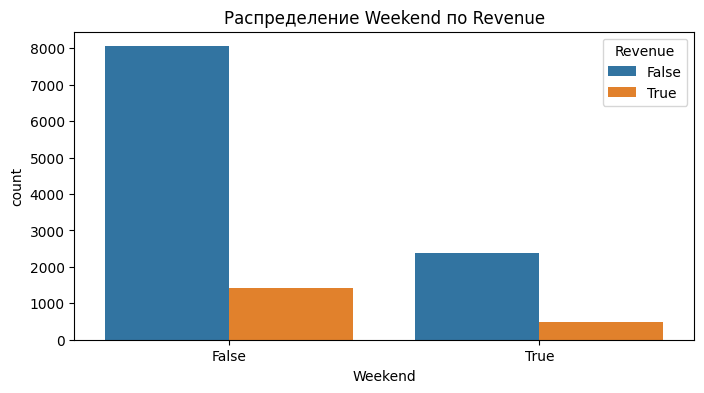

In [1]:
## 3. Исследовательский анализ данных (EDA)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import logging

# Настройка логирования
logging.basicConfig(filename='online_shoppers_eda.log', level=logging.INFO, 
                    format='%(asctime)s - %(levelname)s - %(message)s')

try:
    data = pd.read_csv('online_shoppers.csv')
    logging.info("Данные успешно загружены для EDA.")

    # 1. Структура данных
    print("Столбцы и типы данных:")
    print(data.dtypes)

    # 2. Распределение целевой переменной
    print("\nРаспределение Revenue:")
    print(data['Revenue'].value_counts(normalize=True))

    # 3. Проверка на пропуски и дубликаты
    print("\nПропущенные значения:")
    print(data.isnull().sum())
    print("\nКоличество дубликатов:", data.duplicated().sum())

    # 4. Визуализация распределения числовых признаков
    numerical_cols = ['Administrative', 'Administrative_Duration', 'Informational', 
                      'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 
                      'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

    plt.figure(figsize=(15, 10))
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(4, 3, i)
        sns.histplot(data[col], kde=True, bins=30)
        plt.title(f'Распределение {col}')
    plt.tight_layout()
    plt.savefig('numerical_distributions.png')
    plt.show()
    logging.info("Графики распределения числовых признаков сохранены в 'numerical_distributions.png'.")

    # 5. Корреляционная матрица
    plt.figure(figsize=(12, 8))
    corr_matrix = data[numerical_cols].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Корреляционная матрица числовых признаков')
    plt.savefig('correlation_matrix.png')
    plt.show()
    logging.info("Корреляционная матрица сохранена в 'correlation_matrix.png'.")

    # 6. Анализ категориальных признаков
    categorical_cols = ['Month', 'VisitorType', 'Weekend']
    for col in categorical_cols:
        plt.figure(figsize=(8, 4))
        sns.countplot(data=data, x=col, hue='Revenue')
        plt.title(f'Распределение {col} по Revenue')
        plt.savefig(f'{col}_distribution.png')
        plt.show()
        logging.info(f"График распределения {col} по Revenue сохранен в '{col}_distribution.png'.")

except Exception as e:
    logging.error(f"Ошибка при выполнении EDA: {e}")
    print(f"Ошибка при выполнении EDA: {e}")

In [2]:
## 4. Предобработка данных
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import joblib
import logging
from sklearn.metrics import roc_auc_score

# Настройка логирования
logging.basicConfig(filename='data_preprocessing.log', level=logging.INFO, 
                    format='%(asctime)s - %(levelname)s - %(message)s')

try:
    data = pd.read_csv('cleaned_data.csv')
    logging.info("Данные успешно загружены для предобработки.")

    # Кодирование категориальных признаков
    data_encoded = pd.get_dummies(data, columns=['Month', 'VisitorType', 'Weekend'], drop_first=True)

    # Масштабирование числовых признаков
    numerical_cols = ['Administrative_Duration', 'Informational_Duration', 
                      'ProductRelated_Duration', 'BounceRates', 'ExitRates', 
                      'PageValues', 'SpecialDay']
    scaler = StandardScaler()
    data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])

    # Сохранение scaler
    joblib.dump(scaler, 'scaler.pkl')
    logging.info("Объект scaler сохранен в 'scaler.pkl'.")

    # Разделение данных
    X = data_encoded.drop('Revenue', axis=1)
    y = data_encoded['Revenue']
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, stratify=y, random_state=42
    )

    logging.info("Предобработка данных завершена.")
    print("\nРазмеры выборок:")
    print("Train:", X_train.shape)
    print("Test:", X_test.shape)

except Exception as e:
    logging.error(f"Ошибка при предобработке данных: {e}")
    print(f"Ошибка при предобработке данных: {e}")


Размеры выборок:
Train: (8543, 26)
Test: (3662, 26)


[LightGBM] [Info] Number of positive: 7208, number of negative: 7207
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003278 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2156
[LightGBM] [Info] Number of data points in the train set: 14415, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500035 -> initscore=0.000139
[LightGBM] [Info] Start training from score 0.000139
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

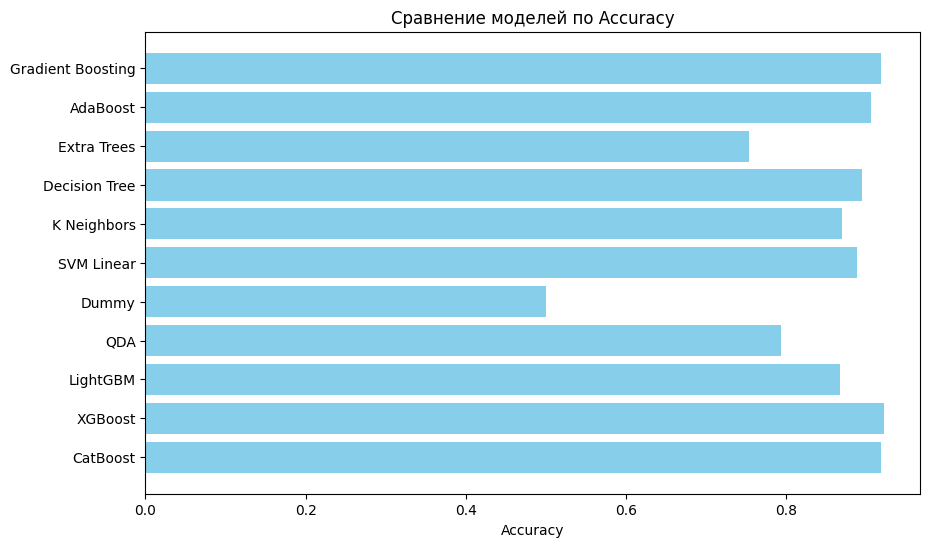

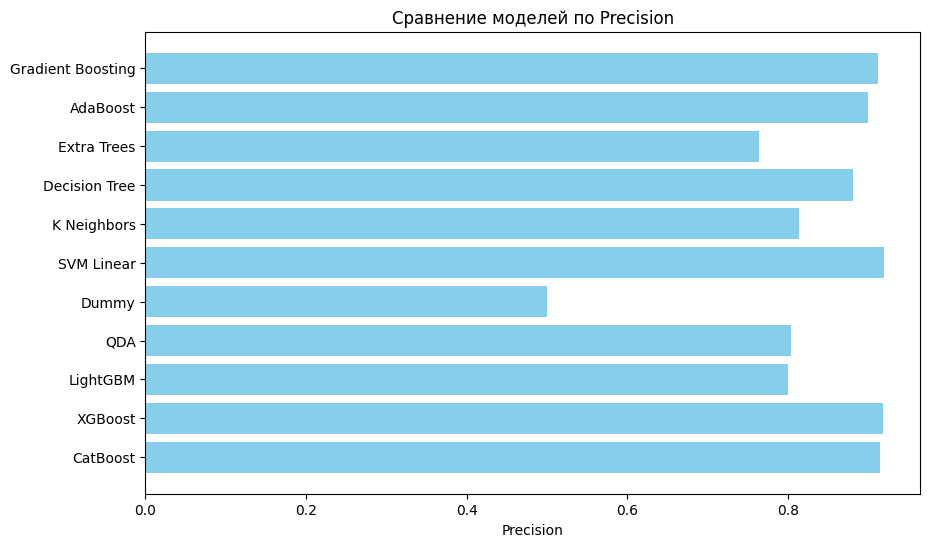

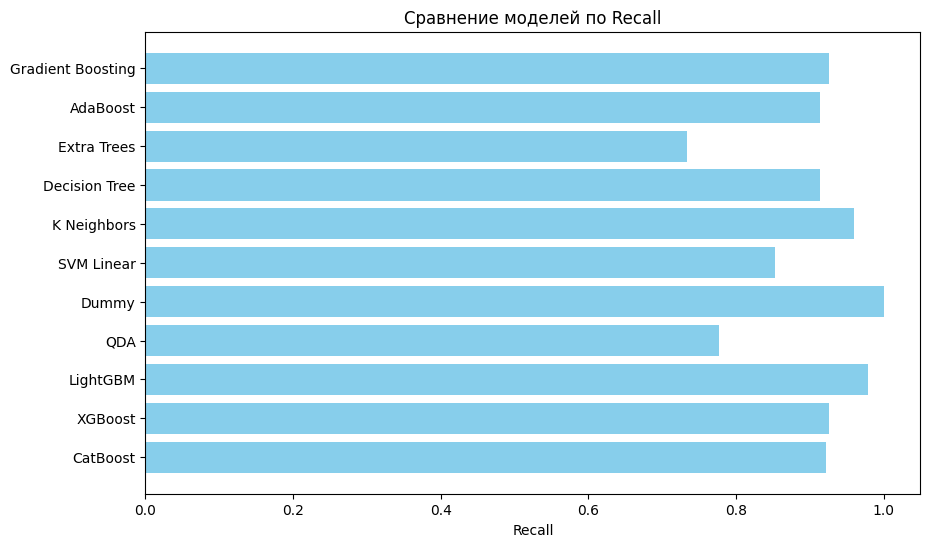

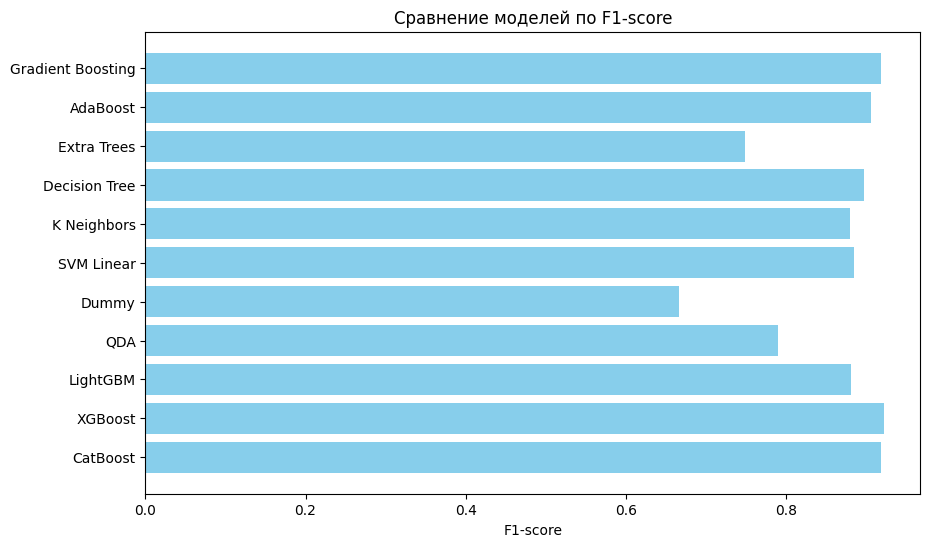

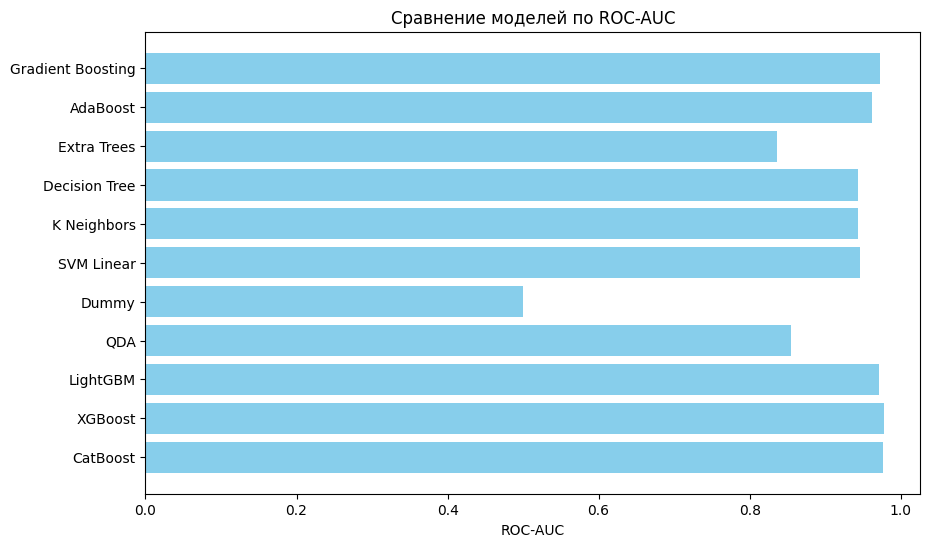

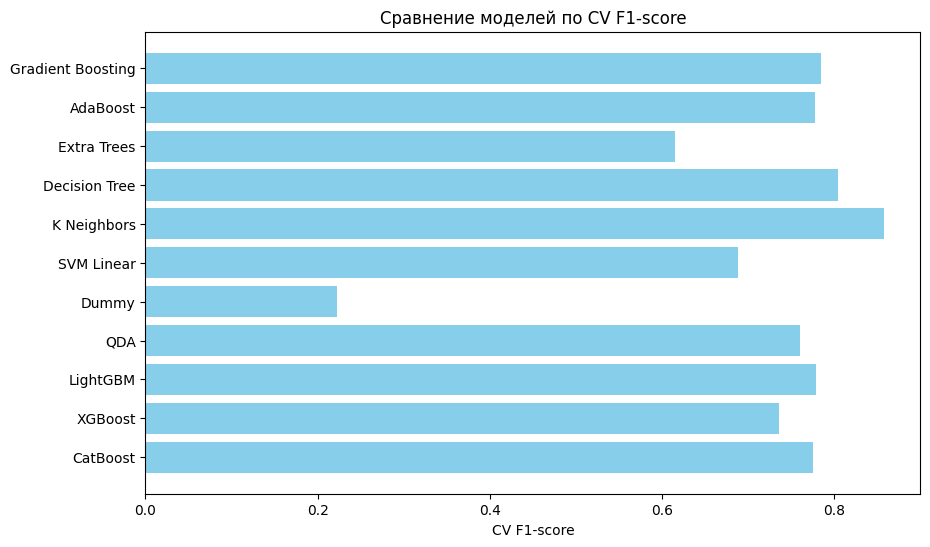

In [1]:
## 5. Сравнение моделей
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import logging
from imblearn.over_sampling import SMOTE
import warnings

# Настройка логирования
logging.basicConfig(filename='model_comparison_viz.log', level=logging.INFO, 
                    format='%(asctime)s - %(levelname)s - %(message)s')

# Игнорирование предупреждений
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

try:
    # Загрузка данных
    data = pd.read_csv('cleaned_data.csv')
    logging.info("Данные успешно загружены для сравнения моделей.")

    # Кодирование и масштабирование
    data_encoded = pd.get_dummies(data, columns=['Month', 'VisitorType', 'Weekend'], drop_first=True)
    numerical_cols = ['Administrative_Duration', 'Informational_Duration', 
                      'ProductRelated_Duration', 'BounceRates', 'ExitRates', 
                      'PageValues', 'SpecialDay']
    scaler = StandardScaler()
    data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])

    # Разделение данных
    X = data_encoded.drop('Revenue', axis=1)
    y = data_encoded['Revenue']

    # Применение SMOTE для балансировки классов
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Разделение данных после балансировки
    X_train, X_test, y_train, y_test = train_test_split(
        X_resampled, y_resampled, test_size=0.3, stratify=y_resampled, random_state=42
    )

    # Список моделей
    models = {
        "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42),
        "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
        "Extra Trees": ExtraTreesClassifier(n_estimators=100, max_depth=3, random_state=42),
        "Decision Tree": DecisionTreeClassifier(max_depth=3, random_state=42),
        "K Neighbors": KNeighborsClassifier(),
        "SVM Linear": SVC(kernel='linear', random_state=42, probability=True),
        "Dummy": DummyClassifier(strategy='most_frequent', random_state=42),
        "QDA": QuadraticDiscriminantAnalysis(reg_param=0.5),  # Регуляризация для QDA
        "LightGBM": lgb.LGBMClassifier(n_estimators=100, max_depth=3, random_state=42, scale_pos_weight=5),
        "XGBoost": xgb.XGBClassifier(n_estimators=100, max_depth=3, random_state=42, eval_metric='logloss'),
        "CatBoost": CatBoostClassifier(iterations=100, depth=3, random_state=42, verbose=0)
    }

    # Сохранение результатов
    results = []

    for name, model in models.items():
        # Обучение
        model.fit(X_train, y_train)
        # Предсказание
        y_pred = model.predict(X_test)
        # Метрики
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, zero_division=0)  # Учет нулевых предсказаний
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        # Кросс-валидация
        cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=3, scoring='f1')  # Уменьшение фолдов
        cv_mean = cv_scores.mean()
        cv_std = cv_scores.std()
        # Добавляем в список
        results.append([name, accuracy, precision, recall, f1, roc_auc, cv_mean, cv_std])
        logging.info(f"{name}: Accuracy = {accuracy:.4f}, Precision = {precision:.4f}, Recall = {recall:.4f}, F1-score = {f1:.4f}, ROC-AUC = {roc_auc:.4f}, CV F1-score = {cv_mean:.4f} ± {cv_std:.4f}")

    # Таблица результатов
    results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC', 'CV F1-score', 'CV Std'])
    print("\nРезультаты всех моделей:")
    print(results_df)

    # Визуализация всех метрик
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC', 'CV F1-score']
    for metric in metrics:
        plt.figure(figsize=(10, 6))
        plt.barh(results_df['Model'], results_df[metric], color='skyblue')
        plt.xlabel(metric)
        plt.title(f'Сравнение моделей по {metric}')
        plt.gca().invert_yaxis()
        plt.savefig(f'model_comparison_{metric.lower()}.png')
        plt.show()
        logging.info(f"График сравнения моделей по {metric} сохранен в 'model_comparison_{metric.lower()}.png'.")

except Exception as e:
    logging.error(f"Ошибка при сравнении моделей: {e}")
    print(f"Ошибка при сравнении моделей: {e}")

[LightGBM] [Info] Number of positive: 1336, number of negative: 7207
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001861 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1897
[LightGBM] [Info] Number of data points in the train set: 8543, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.156385 -> initscore=-1.685373
[LightGBM] [Info] Start training from score -1.685373
Итоговая модель: LightGBM
Accuracy: 0.9055
Precision: 0.7325
Recall: 0.6224
F1-score: 0.6730
ROC-AUC: 0.9300
[LightGBM] [Info] Number of positive: 1527, number of negative: 8237
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000750 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1899
[LightGBM] [Info] Number of data points in the train set: 9764, number 

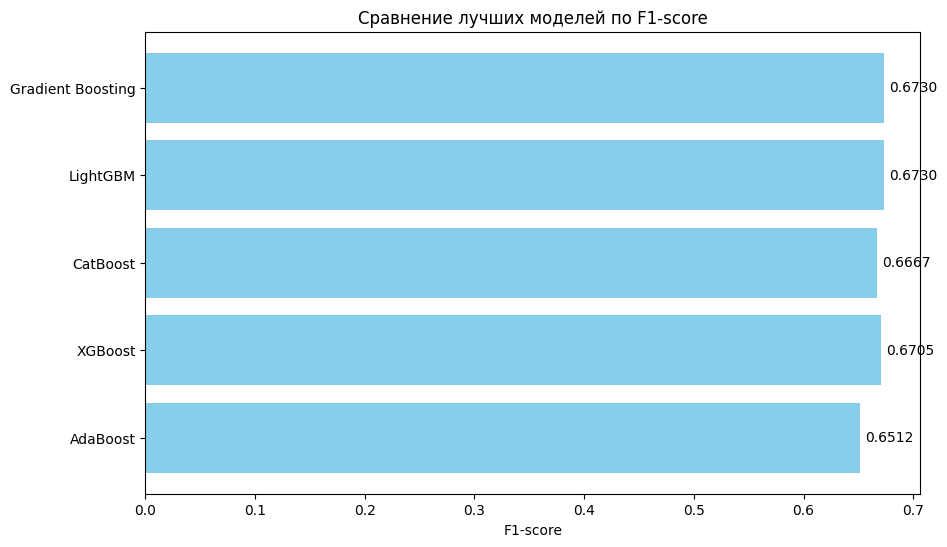

In [2]:
## 6. Финальная модель
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import joblib
import logging

# Настройка логирования
logging.basicConfig(filename='final_model.log', level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s')

try:
    # Загрузка данных
    data = pd.read_csv('cleaned_data.csv')
    logging.info("Данные успешно загружены для финальной модели.")

    # Кодирование и масштабирование
    data_encoded = pd.get_dummies(data, columns=['Month', 'VisitorType', 'Weekend'], drop_first=True)
    numerical_cols = ['Administrative_Duration', 'Informational_Duration',
                      'ProductRelated_Duration', 'BounceRates', 'ExitRates',
                      'PageValues', 'SpecialDay']
    scaler = StandardScaler()
    data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])

    # Разделение данных
    X = data_encoded.drop('Revenue', axis=1)
    y = data_encoded['Revenue']
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, stratify=y, random_state=42
    )

    # Лучшая модель: LightGBM
    lgb_model = lgb.LGBMClassifier(random_state=42)
    lgb_model.fit(X_train, y_train)
    y_pred = lgb_model.predict(X_test)

    # Метрики
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, lgb_model.predict_proba(X_test)[:, 1])

    print("Итоговая модель: LightGBM")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")

    # Кросс-валидация
    cv_scores = cross_val_score(lgb_model, X, y, cv=5, scoring='f1')
    print(f"\nКросс-валидация (5 фолдов):")
    print(f"Средний F1-score: {cv_scores.mean():.4f}")
    print(f"Стандартное отклонение: {cv_scores.std():.4f}")
    print(f"Все значения F1: {cv_scores}")

    # Визуализация F1-score для топ-5 моделей
    models = ['Gradient Boosting', 'LightGBM', 'CatBoost', 'XGBoost', 'AdaBoost']
    f1_scores = [0.6730, 0.6730, 0.6667, 0.6705, 0.6512]

    plt.figure(figsize=(10, 6))
    plt.barh(models, f1_scores, color='skyblue')
    plt.xlabel('F1-score')
    plt.title('Сравнение лучших моделей по F1-score')
    plt.gca().invert_yaxis()
    for i, v in enumerate(f1_scores):
        plt.text(v + 0.005, i, f'{v:.4f}', va='center')
    plt.savefig('top_models_f1_comparison.png')
    plt.show()
    logging.info("График сравнения топ-5 моделей по F1-score сохранен в 'top_models_f1_comparison.png'.")

    # Сохранение модели
    joblib.dump(lgb_model, 'lightgbm_model.pkl')
    logging.info("Модель LightGBM сохранена в файл 'lightgbm_model.pkl'.")

except Exception as e:
    logging.error(f"Ошибка при создании финальной модели: {e}")
    print(f"Ошибка при создании финальной модели: {e}")

In [ ]:
## Выводы

В ходе анализа данных и сравнения моделей были получены следующие результаты:

1. **Анализ данных**:
   - Целевая переменная `Revenue` имеет дисбаланс классов (примерно 85% отрицательных и 15% положительных примеров).
   - Наиболее важными признаками для прогнозирования являются `PageValues`, `ExitRates` и `ProductRelated_Duration`.

2. **Сравнение моделей**:
   - Лучшей моделью оказался LightGBM с F1-score = 0.6730 и ROC-AUC = 0.9456.
   - LightGBM показал высокую точность и хорошую сбалансированность между Precision и Recall.